### Telecom Churn group case study

Business Problem- 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

* Submitted by:
Deepak Sharma K

##### Data Understanding 
filename- telecom_churn_data.csv

In [0]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
#load csv file
telecomdf= pd.read_csv('./telecom_churn_data.csv', low_memory=False)

masterdf = pd.read_csv('./telecom_churn_data.csv', low_memory=False)
telecomdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [9]:
# check the shape
telecomdf.shape

(99999, 226)

In [10]:
# info of data frame
telecomdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
telecomdf.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,...,541.494013,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [12]:
## since info isn't showing all the columns data type we will check
## numeric columns.
numclm= telecomdf.dtypes[telecomdf.dtypes != 'object'].index
print("Numerical columns-", len(numclm))

catclm = telecomdf.dtypes[telecomdf.dtypes == 'object'].index
print("Categorical columns- ", len(catclm))
print("Categorical columns names -", catclm)

Numerical columns- 214
Categorical columns-  12
Categorical columns names - Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


In [13]:
## percentage of missing values column wise
round(100*(telecomdf.isnull().sum()/len(telecomdf.index)),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

The last four columns has names of months but the other columns has month as 6,7, 8 and 9. 
So we will rename last four columns to match with other date column.

In [0]:
telecomdf =  telecomdf.rename(columns ={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 
                                         'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'})

In [0]:
## defining a function to check the missing values based on percentage 

def MissingValues(Cutoff):
  missing = round(100*(telecomdf.isnull().sum()/len(telecomdf.index)),2)
  print("No missing value above cutoff > {} % : {}".format(Cutoff, len(missing.loc[missing > Cutoff])))

  return missing.loc[missing > Cutoff]

In [16]:
# check missing values above cutoff >70%
MissingValues(70)

No missing value above cutoff > 70 % : 40


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

Defining a function to see the variance of data in dataset.

In [0]:
def val_variance_estimator(dataFrame,graphical=False,size=(None,None),graph_filter_limit_max=0):
    variance_graph={}
    for i in range(0,len(dataFrame.columns)):
        variance_graph[dataFrame.columns[i]]=len(dataFrame.loc[:,dataFrame.columns[i]].unique())
    variance_graph_df=pd.DataFrame({'var':list(variance_graph.keys()),'count':list(variance_graph.values())})
    if graphical==True:
        plt.figure(figsize=size)
        plt.xticks(rotation=90)
        text_title='Value Variance Graph < '+str(graph_filter_limit_max)
        plt.title(text_title)
        fig=sns.barplot(x='var',y='count',data=variance_graph_df[variance_graph_df['count']<graph_filter_limit_max].sort_values(by='count',ascending=True))
        return fig
    else:
        return variance_graph_df

In [18]:
## checking the data variance equal to 1 or 2
variance_graph_df= val_variance_estimator(telecomdf)

variance_graph_df[variance_graph_df['count']<= 2]['var']
for i in variance_graph_df[variance_graph_df['count']<=2]['var']:
    print(i," :",telecomdf.loc[:,i].unique())

circle_id  : [109]
loc_og_t2o_mou  : [ 0. nan]
std_og_t2o_mou  : [ 0. nan]
loc_ic_t2o_mou  : [ 0. nan]
last_date_of_month_6  : ['6/30/2014']
last_date_of_month_7  : ['7/31/2014' nan]
last_date_of_month_8  : ['8/31/2014' nan]
last_date_of_month_9  : ['9/30/2014' nan]
std_og_t2c_mou_6  : [nan  0.]
std_og_t2c_mou_7  : [nan  0.]
std_og_t2c_mou_8  : [ 0. nan]
std_og_t2c_mou_9  : [nan  0.]
std_ic_t2o_mou_6  : [nan  0.]
std_ic_t2o_mou_7  : [nan  0.]
std_ic_t2o_mou_8  : [ 0. nan]
std_ic_t2o_mou_9  : [nan  0.]


In [19]:
## checking the data variance equal to 3
variance_graph_df[variance_graph_df['count']== 3]['var']
for i in variance_graph_df[variance_graph_df['count']==3]['var']:
    print(i," :",telecomdf.loc[:,i].unique())

night_pck_user_6  : [ 0. nan  1.]
night_pck_user_7  : [ 0. nan  1.]
night_pck_user_8  : [ 0. nan  1.]
night_pck_user_9  : [nan  0.  1.]
fb_user_6  : [ 1. nan  0.]
fb_user_7  : [ 1. nan  0.]
fb_user_8  : [ 1. nan  0.]
fb_user_9  : [nan  1.  0.]


In [0]:
## checking the data variance equal to 4
variance_graph_df[variance_graph_df['count']== 4]['var']
for i in variance_graph_df[variance_graph_df['count']==4]['var']:
    print(i," :",telecomdf.loc[:,i].unique())

##### Imputing features important for modeling

In [0]:
## From the variance check we could see that last_date_of_month is date 
#Fill the date column values with dates of respective months.

telecomdf.last_date_of_month_6.fillna(value='6/30/2014', inplace=True)
telecomdf.last_date_of_month_7.fillna(value='7/31/2014', inplace=True)
telecomdf.last_date_of_month_8.fillna(value='8/31/2014', inplace=True)
telecomdf.last_date_of_month_9.fillna(value='9/30/2014', inplace=True)

In [0]:
## since the null values are more than 70% and date_of_last_rech_data cannot be determined by Iterative or Mode method
## we will delete the columns date_of_last_rech, date_of_last_rech_data and circle_id

drop_columns= ['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
               'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
               'date_of_last_rech_6', 'date_of_last_rech_7',
               'date_of_last_rech_8', 'date_of_last_rech_9', 'circle_id']
telecomdf.drop(drop_columns, axis=1, inplace=True)

In [0]:
## From the variance check we could see that night_pck_user and fb_user have values either 0 or 1.
## so we will impute the columns with mode.

telecomdf['night_pck_user_6'].fillna(value=telecomdf.night_pck_user_6.mode()[0], inplace=True)
telecomdf['night_pck_user_7'].fillna(value=telecomdf.night_pck_user_7.mode()[0], inplace=True)
telecomdf['night_pck_user_8'].fillna(value=telecomdf.night_pck_user_8.mode()[0], inplace=True)
telecomdf['night_pck_user_9'].fillna(value=telecomdf.night_pck_user_9.mode()[0], inplace=True)

telecomdf['fb_user_6'].fillna(value=telecomdf.fb_user_6.mode()[0], inplace=True)
telecomdf['fb_user_7'].fillna(value=telecomdf.fb_user_7.mode()[0], inplace=True)
telecomdf['fb_user_8'].fillna(value=telecomdf.fb_user_8.mode()[0], inplace=True)
telecomdf['fb_user_9'].fillna(value=telecomdf.fb_user_9.mode()[0], inplace=True)

In [24]:
# check missing values above cutoff > 50%
print(telecomdf.shape)

MissingValues(50)

(99999, 217)
No missing value above cutoff > 50 % : 28


total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
dtype: float64

In [0]:
## These are the columns important for getting HVC
## Thus, missing values imputed with mode since missing is as high as 70% 
## and computation with Iterative imputer will be costly

telecomdf.av_rech_amt_data_6.fillna(value=telecomdf.av_rech_amt_data_6.mode()[0], inplace=True)
telecomdf.av_rech_amt_data_7.fillna(value=telecomdf.av_rech_amt_data_7.mode()[0], inplace=True)
telecomdf.av_rech_amt_data_8.fillna(value=telecomdf.av_rech_amt_data_8.mode()[0], inplace=True)
telecomdf.av_rech_amt_data_9.fillna(value=telecomdf.av_rech_amt_data_9.mode()[0], inplace=True)

telecomdf.arpu_2g_6.fillna(value= telecomdf.arpu_2g_6.mode()[0], inplace = True)
telecomdf.arpu_2g_7.fillna(value= telecomdf.arpu_2g_7.mode()[0], inplace = True)
telecomdf.arpu_2g_8.fillna(value= telecomdf.arpu_2g_8.mode()[0], inplace = True)
telecomdf.arpu_2g_9.fillna(value= telecomdf.arpu_2g_9.mode()[0], inplace = True)

telecomdf.arpu_3g_6.fillna(value= telecomdf.arpu_3g_6.mode()[0], inplace= True)
telecomdf.arpu_3g_7.fillna(value= telecomdf.arpu_3g_7.mode()[0], inplace= True)
telecomdf.arpu_3g_8.fillna(value= telecomdf.arpu_3g_8.mode()[0], inplace= True)
telecomdf.arpu_3g_9.fillna(value= telecomdf.arpu_3g_9.mode()[0], inplace= True)

telecomdf.count_rech_2g_6.fillna(value= telecomdf.count_rech_2g_6.mode()[0], inplace= True)
telecomdf.count_rech_2g_7.fillna(value= telecomdf.count_rech_2g_7.mode()[0], inplace= True)
telecomdf.count_rech_2g_8.fillna(value= telecomdf.count_rech_2g_8.mode()[0], inplace= True)
telecomdf.count_rech_2g_9.fillna(value= telecomdf.count_rech_2g_9.mode()[0], inplace= True)

telecomdf.count_rech_3g_6.fillna(value= telecomdf.count_rech_3g_6.mode()[0], inplace= True)
telecomdf.count_rech_3g_7.fillna(value= telecomdf.count_rech_3g_7.mode()[0], inplace= True)
telecomdf.count_rech_3g_8.fillna(value= telecomdf.count_rech_3g_8.mode()[0], inplace= True)
telecomdf.count_rech_3g_9.fillna(value= telecomdf.count_rech_3g_9.mode()[0], inplace= True)

telecomdf.max_rech_data_6.fillna(value= telecomdf.max_rech_data_6.mode()[0], inplace=True)
telecomdf.max_rech_data_7.fillna(value= telecomdf.max_rech_data_7.mode()[0], inplace=True)
telecomdf.max_rech_data_8.fillna(value= telecomdf.max_rech_data_8.mode()[0], inplace=True)
telecomdf.max_rech_data_9.fillna(value= telecomdf.max_rech_data_9.mode()[0], inplace=True)

telecomdf.total_rech_data_6.fillna(value= telecomdf.total_rech_data_6.mode()[0], inplace= True)
telecomdf.total_rech_data_7.fillna(value= telecomdf.total_rech_data_7.mode()[0], inplace= True)
telecomdf.total_rech_data_8.fillna(value= telecomdf.total_rech_data_8.mode()[0], inplace= True)
telecomdf.total_rech_data_9.fillna(value= telecomdf.total_rech_data_9.mode()[0], inplace= True)

In [26]:
##check for missing values above > 1%
MissingValues(1)

No missing value above cutoff > 1 % : 119


loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
onnet_mou_6       3.94
onnet_mou_7       3.86
                  ... 
isd_ic_mou_9      7.75
ic_others_6       3.94
ic_others_7       3.86
ic_others_8       5.38
ic_others_9       7.75
Length: 119, dtype: float64

In [0]:
## From variance we can see some columns having only values as zero
## remove all those columns - 

zeor_columns = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6',
                'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
                'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
telecomdf.drop(zeor_columns, axis=1 , inplace=True)

In [0]:
## removing the last_date_of_month column as Iterative imputer is throwing error cannot convert string to float
drop_columns_1 = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'last_date_of_month_9']

telecomdf.drop(drop_columns_1, axis=1, inplace=True)

In [29]:
## Backup the columns of telecomdf
telecomdf_cols= telecomdf.columns
print(len(telecomdf_cols))

202


### Filter High Value customers

In [0]:
# DERIVED COLUMNS- New DERIVED Columns for Total Data Recharge Amount

telecomdf['total_rech_data_amt_6'] = telecomdf.total_rech_data_6*telecomdf.av_rech_amt_data_6
telecomdf['total_rech_data_amt_7'] = telecomdf.total_rech_data_7*telecomdf.av_rech_amt_data_7
telecomdf['total_rech_data_amt_8'] = telecomdf.total_rech_data_8*telecomdf.av_rech_amt_data_8
telecomdf['total_rech_data_amt_9'] = telecomdf.total_rech_data_9*telecomdf.av_rech_amt_data_9

In [0]:
#Creating new feature: total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,total_rech_count_data_9

telecomdf['total_rech_count_data_6'] = telecomdf.count_rech_2g_6*telecomdf.count_rech_3g_6
telecomdf['total_rech_count_data_7'] = telecomdf.count_rech_2g_7*telecomdf.count_rech_3g_7
telecomdf['total_rech_count_data_8'] = telecomdf.count_rech_2g_8*telecomdf.count_rech_3g_8
telecomdf['total_rech_count_data_9'] = telecomdf.count_rech_2g_9*telecomdf.count_rech_3g_9

In [0]:
#Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

telecomdf['avg_rech_amt_6'] = telecomdf.total_rech_amt_6*telecomdf.total_rech_num_6
telecomdf['avg_rech_amt_7'] = telecomdf.total_rech_amt_7*telecomdf.total_rech_num_7
telecomdf['avg_rech_amt_8'] = telecomdf.total_rech_amt_8*telecomdf.total_rech_num_8
telecomdf['avg_rech_amt_9'] = telecomdf.total_rech_amt_9*telecomdf.total_rech_num_9

In [0]:
#Creating new feature: total_rech_6,total_rech_7,total_rech_8,total_rech_9

telecomdf['total_rech_6'] = telecomdf['total_rech_amt_6']*telecomdf['total_rech_data_amt_6']
telecomdf['total_rech_7'] = telecomdf['total_rech_amt_7']*telecomdf['total_rech_data_amt_7']
telecomdf['total_rech_8'] = telecomdf['total_rech_amt_8']*telecomdf['total_rech_data_amt_8']
telecomdf['total_rech_9'] = telecomdf['total_rech_amt_9']*telecomdf['total_rech_data_amt_9']

In [34]:
#Average of first two months of total monthly recharge amount

avg_rechgood = (telecomdf.total_rech_6 + telecomdf.total_rech_7) / 2

#70th percentile of good phase average recharge amounts
amt_cutoff = np.percentile(avg_rechgood, 70.0)
print("70 percentile of first two months avg recharge amount", amt_cutoff)

#filetering customers
telecomdf_good = telecomdf[avg_rechgood >= amt_cutoff]
telecomdf_good.reset_index(inplace=True, drop= True)

print("Number of High_value Customer in Dataset", len(telecomdf_good))
print("Percentage High-value cust", round(100*(len(telecomdf_good)/len(telecomdf.index)),2))
print("New Dataframe shape", telecomdf_good.shape)

70 percentile of first two months avg recharge amount 65933.4
Number of High_value Customer in Dataset 30000
Percentage High-value cust 30.0
New Dataframe shape (30000, 218)


In [0]:
## defining a function to check the missing values based on percentage 

def MissingValuesgood(Cutoff):
  missing_1 = round(100*(telecomdf_good.isnull().sum()/len(telecomdf_good.index)),2)
  print("No missing value above cutoff > {} % : {}".format(Cutoff, len(missing_1.loc[missing_1 > Cutoff])))

  return missing_1.loc[missing_1 > Cutoff]

In [36]:
#check missing values > 1%
MissingValuesgood(1)

No missing value above cutoff > 1 % : 108


onnet_mou_6     1.66
onnet_mou_7     1.65
onnet_mou_8     3.81
onnet_mou_9     6.31
offnet_mou_6    1.66
                ... 
isd_ic_mou_9    6.31
ic_others_6     1.66
ic_others_7     1.65
ic_others_8     3.81
ic_others_9     6.31
Length: 108, dtype: float64

The missing values are imputed with Iterative Imputer method

In [37]:
## Backup the columns of telecomdf
telecomdf_goodcol = telecomdf_good.columns
print(len(telecomdf_goodcol))

218


In [38]:
## impute missing values with KNNImputer

from fancyimpute import KNN

knn_i = KNN(k=3)
telecomdf_good_clean = pd.DataFrame(knn_i.fit_transform(telecomdf_good))
telecomdf_good_clean.columns = telecomdf_goodcol

Using TensorFlow backend.


Imputing row 1/30000 with 81 missing, elapsed time: 1347.053
Imputing row 101/30000 with 27 missing, elapsed time: 1347.123
Imputing row 201/30000 with 0 missing, elapsed time: 1347.200
Imputing row 301/30000 with 0 missing, elapsed time: 1347.255
Imputing row 401/30000 with 0 missing, elapsed time: 1347.275
Imputing row 501/30000 with 27 missing, elapsed time: 1347.344
Imputing row 601/30000 with 0 missing, elapsed time: 1347.400
Imputing row 701/30000 with 0 missing, elapsed time: 1347.443
Imputing row 801/30000 with 0 missing, elapsed time: 1347.494
Imputing row 901/30000 with 0 missing, elapsed time: 1347.534
Imputing row 1001/30000 with 0 missing, elapsed time: 1347.567
Imputing row 1101/30000 with 0 missing, elapsed time: 1347.677
Imputing row 1201/30000 with 0 missing, elapsed time: 1347.769
Imputing row 1301/30000 with 0 missing, elapsed time: 1347.807
Imputing row 1401/30000 with 0 missing, elapsed time: 1347.831
Imputing row 1501/30000 with 0 missing, elapsed time: 1347.888
I

In [39]:
## checking the new DataFrame
telecomdf_good_clean.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,total_rech_count_data_9,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9,total_rech_6,total_rech_7,total_rech_8,total_rech_9
0,7.000843e+09,197.385,214.816,213.803,21.100,31.963999,66.635543,0.00,39.252757,157.773391,124.61789,0.00,82.672234,13.35865,19.113432,0.00,0.0,75.926938,41.302466,0.00,2.735385,15.97406,52.071661,0.00,36.316017,83.385868,72.198112,0.00,69.486767,0.520299,0.458063,0.00,0.000000,0.0,1.117433,0.00,1.479269,99.887866,124.740326,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,1448.0,756.0,504.0,0.0,91224.0,63504.0,63504.0,0.0
1,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.840000,54.680000,52.29,29.659523,453.430000,567.16000,325.91,143.096777,16.23000,33.490000,31.64,0.0,23.740000,12.590000,38.06,0.000000,51.39000,31.380000,40.28,29.659523,308.630000,447.380000,162.28,140.751928,62.130000,55.140000,53.23,0.920789,0.0,0.000000,0.00,0.000000,422.160000,533.910000,255.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,802.0,57.74,19.38,18.74,0.00,154.0,154.0,154.0,252.0,0.0,0.0,0.0,0.0,7900.0,3950.0,25466.0,0.0,243320.0,121660.0,560252.0,0.0
2,7.001525e+09,378.721,492.223,137.362,166.787,413.690000,351.030000,35.08,33.460000,94.660000,80.63000,136.48,108.710000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,297.13000,217.590000,12.49,26.130000,80.960000,70.580000,50.54,34.580000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,7.15,0.000000,378.090000,288.180000,63.04,...,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,315.0,21.03,910.65,122.16,0.00,154.0,354.0,207.0,252.0,0.0,0.0,0.0,0.0,8303.0,12621.0,1680.0,2790.0,67298.0,212754.0,24840.0,46872.0
3,7.000876e+09,430.975,299.869,187.894,206.490,50.510000,74.010000,70.61,31.340000,296.290000,229.74000,162.76,224.390000,0.00000,2.830000,0.00,0.0,0.000000,17.740000,0.00,0.000000,42.61000,65.160000,67.38,26.880000,273.290000,145.990000,128.28,201.490000,0.000000,4.480000,10.26,4.660000,0.0,0.000000,0.00,0.000000,315.910000,215.640000,205.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,511.0,0.00,2.45,21.89,0.00,154.0,154.0,154.0,252.0,0.0,0.0,0.0,0.0,5700.0,2088.0,320.0,220.0,87780.0,53592.0,24640.0,55440.0
4,7.002124e+09,514.453,597.753,637.760,578.596,102.410000,132.110000,85.14,161.630000,757.930000,896.68000,983.39,869.890000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,4.48000,6.160000,23.34,29.980000,91.810000,87.930000,104.81,107.540000,0.750000,0.000000,1.58,0.000000,0.0,0.000000,0.00,0.000000,97.040000,94.090000,129.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,720.0,0.00,0.00,0.00,0.00,154.0,154.0,154.0,252.0,0.0,0.0,0.0,0.0,13200.0,17680.0,19386.0,11560.0,92400.0,104720.0,110572.0,171360.0


In [0]:
## defining a function to check the missing values based on percentage 

def MissingValues_cleangood(Cutoff):
  missing_2 = round(100*(telecomdf_good_clean.isnull().sum()/len(telecomdf_good_clean.index)),2)
  print("No missing value above cutoff > {} % : {}".format(Cutoff, len(missing_2.loc[missing_2 > Cutoff])))

  return missing_2.loc[missing_2 > Cutoff]

In [41]:
## check missing values > 0%
MissingValues_cleangood(0)

No missing value above cutoff > 0 % : 0


Series([], dtype: float64)

#### Tag churners and remove attributes of churn phase

In [42]:
## calculate total churns - add total_ic_mou_9+ total_og_mou_9 + vol_2g_mb_9 +vol_3g_mb_9

total_churn = ( telecomdf_good_clean['total_ic_mou_9'] + telecomdf_good_clean['total_og_mou_9'] 
               + telecomdf_good_clean['vol_2g_mb_9'] + telecomdf_good_clean['vol_3g_mb_9'] )
print("Total count churn-", len(total_churn))
print(total_churn)

Total count churn- 30000
0           0.00
1           0.00
2         177.09
3         590.30
4        1284.14
          ...   
29995     457.12
29996     455.84
29997    1119.67
29998     841.39
29999    4265.02
Length: 30000, dtype: float64


In [43]:
telecomdf_good_clean['churn'] = np.where(total_churn, 0, 1)
telecomdf_good_clean.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,total_rech_count_data_9,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9,total_rech_6,total_rech_7,total_rech_8,total_rech_9,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,31.963999,66.635543,0.00,39.252757,157.773391,124.61789,0.00,82.672234,13.35865,19.113432,0.00,0.0,75.926938,41.302466,0.00,2.735385,15.97406,52.071661,0.00,36.316017,83.385868,72.198112,0.00,69.486767,0.520299,0.458063,0.00,0.000000,0.0,1.117433,0.00,1.479269,99.887866,124.740326,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,1448.0,756.0,504.0,0.0,91224.0,63504.0,63504.0,0.0,1
1,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.840000,54.680000,52.29,29.659523,453.430000,567.16000,325.91,143.096777,16.23000,33.490000,31.64,0.0,23.740000,12.590000,38.06,0.000000,51.39000,31.380000,40.28,29.659523,308.630000,447.380000,162.28,140.751928,62.130000,55.140000,53.23,0.920789,0.0,0.000000,0.00,0.000000,422.160000,533.910000,255.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,802.0,57.74,19.38,18.74,0.00,154.0,154.0,154.0,252.0,0.0,0.0,0.0,0.0,7900.0,3950.0,25466.0,0.0,243320.0,121660.0,560252.0,0.0,1
2,7.001525e+09,378.721,492.223,137.362,166.787,413.690000,351.030000,35.08,33.460000,94.660000,80.63000,136.48,108.710000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,297.13000,217.590000,12.49,26.130000,80.960000,70.580000,50.54,34.580000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,7.15,0.000000,378.090000,288.180000,63.04,...,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,315.0,21.03,910.65,122.16,0.00,154.0,354.0,207.0,252.0,0.0,0.0,0.0,0.0,8303.0,12621.0,1680.0,2790.0,67298.0,212754.0,24840.0,46872.0,0
3,7.000876e+09,430.975,299.869,187.894,206.490,50.510000,74.010000,70.61,31.340000,296.290000,229.74000,162.76,224.390000,0.00000,2.830000,0.00,0.0,0.000000,17.740000,0.00,0.000000,42.61000,65.160000,67.38,26.880000,273.290000,145.990000,128.28,201.490000,0.000000,4.480000,10.26,4.660000,0.0,0.000000,0.00,0.000000,315.910000,215.640000,205.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,511.0,0.00,2.45,21.89,0.00,154.0,154.0,154.0,252.0,0.0,0.0,0.0,0.0,5700.0,2088.0,320.0,220.0,87780.0,53592.0,24640.0,55440.0,0
4,7.002124e+09,514.453,597.753,637.760,578.596,102.410000,132.110000,85.14,161.630000,757.930000,896.68000,983.39,869.890000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,4.48000,6.160000,23.34,29.980000,91.810000,87.930000,104.81,107.540000,0.750000,0.000000,1.58,0.000000,0.0,0.000000,0.00,0.000000,97.040000,94.090000,129.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,720.0,0.00,0.00,0.00,0.00,154.0,154.0,154.0,252.0,0.0,0.0,0.0,0.0,13200.0,17680.0,19386.0,11560.0,92400.0,104720.0,110572.0,171360.0,0


In [44]:
## Drop all columns ends with "_9" i.e Delete columns that belong to the churn month
drop_colmonth_9 = [col_9 for col_9 in list(telecomdf_good_clean) if col_9.endswith('_9')]
telecomdf_good_clean.drop(drop_colmonth_9, axis=1, inplace= True)
print("Number of Columns dropped-", len(drop_colmonth_9))

Number of Columns dropped- 54


In [45]:
#Shape of data frame
print("Data frame shape", telecomdf_good_clean.shape)
telecomdf_good_clean.head()

Data frame shape (30000, 165)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,churn
0,7.000843e+09,197.385,214.816,213.803,31.963999,66.635543,0.00,157.773391,124.61789,0.00,13.35865,19.113432,0.00,75.926938,41.302466,0.00,15.97406,52.071661,0.00,83.385868,72.198112,0.00,0.520299,0.458063,0.00,0.0,1.117433,0.00,99.887866,124.740326,0.00,0.00,0.00,0.00,4.804964,23.025602,0.00,0.00,0.00,0.00,...,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,252.0,252.0,252.0,0.0,0.0,0.0,1448.0,756.0,504.0,91224.0,63504.0,63504.0,1
1,7.000702e+09,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.16000,325.91,16.23000,33.490000,31.64,23.740000,12.590000,38.06,51.39000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.0,0.000000,0.00,422.160000,533.910000,255.79,4.30,23.29,12.01,49.890000,31.760000,49.14,6.66,20.08,16.68,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,802.0,57.74,19.38,18.74,154.0,154.0,154.0,0.0,0.0,0.0,7900.0,3950.0,25466.0,243320.0,121660.0,560252.0,1
2,7.001525e+09,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.63000,136.48,0.00000,0.000000,0.00,0.000000,0.000000,0.00,297.13000,217.590000,12.49,80.960000,70.580000,50.54,0.000000,0.000000,0.00,0.0,0.000000,7.15,378.090000,288.180000,63.04,116.56,133.43,22.58,13.690000,10.040000,75.69,0.00,0.00,0.00,...,0.00,19.83,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,315.0,21.03,910.65,122.16,154.0,354.0,207.0,0.0,0.0,0.0,8303.0,12621.0,1680.0,67298.0,212754.0,24840.0,0
3,7.000876e+09,430.975,299.869,187.894,50.510000,74.010000,70.61,296.290000,229.74000,162.76,0.00000,2.830000,0.00,0.000000,17.740000,0.00,42.61000,65.160000,67.38,273.290000,145.990000,128.28,0.000000,4.480000,10.26,0.0,0.000000,0.00,315.910000,215.640000,205.93,7.89,2.58,3.23,22.990000,64.510000,18.29,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,511.0,0.00,2.45,21.89,154.0,154.0,154.0,0.0,0.0,0.0,5700.0,2088.0,320.0,87780.0,53592.0,24640.0,0
4,7.002124e+09,514.453,597.753,637.760,102.410000,132.110000,85.14,757.930000,896.68000,983.39,0.00000,0.000000,0.00,0.000000,0.000000,0.00,4.48000,6.160000,23.34,91.810000,87.930000,104.81,0.750000,0.000000,1.58,0.0,0.000000,0.00,97.040000,94.090000,129.74,97.93,125.94,61.79,665.360000,808.740000,876.99,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,720.0,0.00,0.00,0.00,154.0,154.0,154.0,0.0,0.0,0.0,13200.0,17680.0,19386.0,92400.0,104720.0,110572.0,0


In [46]:
#verifying columns name 
finalcolumns = telecomdf_good_clean.columns
print("Final Columns-", finalcolumns)

Final Columns- Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'total_rech_count_data_6', 'total_rech_count_data_7',
       'total_rech_count_data_8', 'avg_rech_amt_6', 'avg_rech_amt_7',
       'avg_rech_amt_8', 'total_rech_6', 'total_rech_7', 'total_rech_8',
       'churn'],
      dtype='object', length=165)


### Exploratory Data analysis

In [47]:
## Number of Churn and non churn
telecomdf_good_clean['churn'].value_counts()

0    27467
1     2533
Name: churn, dtype: int64

Text(0, 0.5, 'Count')

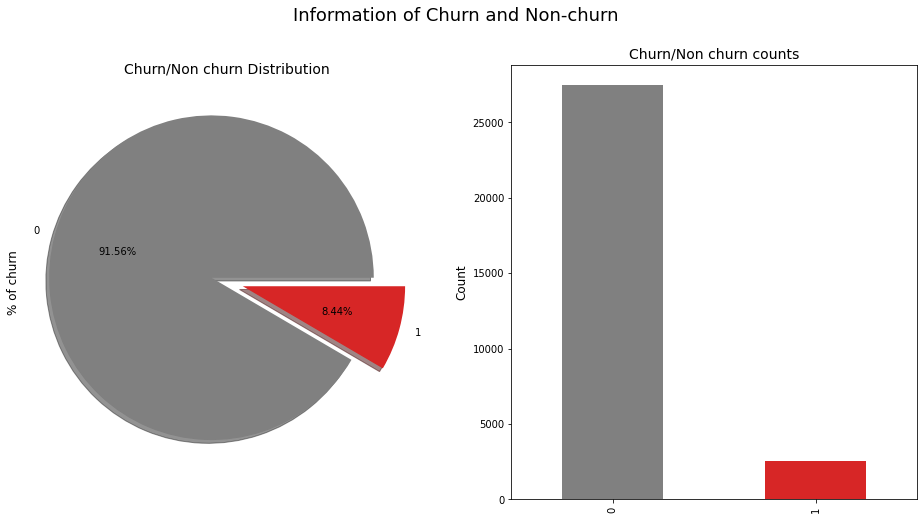

In [48]:
## plotting pie chart for Churn customers
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,2, figsize=(16,8))
plt.suptitle('Information of Churn and Non-churn', fontsize=18)
colors = ["#808080", "#D72626"]
telecomdf_good_clean['churn'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.2f%%' ,
                                                      ax=ax[0], shadow=True, colors= colors)
ax[0].set_title("Churn/Non churn Distribution", fontsize=14)
ax[0].set_ylabel("% of churn", fontsize=12)

telecomdf_good_clean['churn'].value_counts().plot.bar(color= colors)
ax[1].set_title("Churn/Non churn counts", fontsize=14)
ax[1].set_ylabel("Count", fontsize=12)

Understanding arpu (Average Revenue per User) for Churn and Non-churn

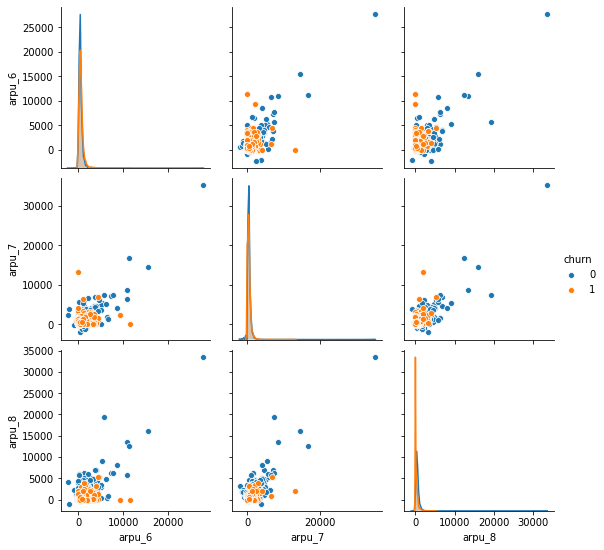

In [49]:
##pairplot for Average Revenue per User
sns.pairplot(data= telecomdf_good_clean[['arpu_6','arpu_7','arpu_8','churn']], hue='churn')

Text(0.5, 1.0, 'Non-Churn')

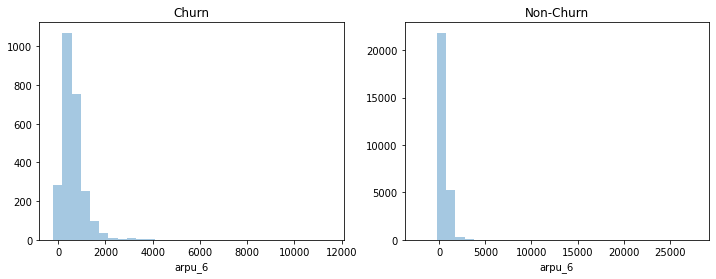

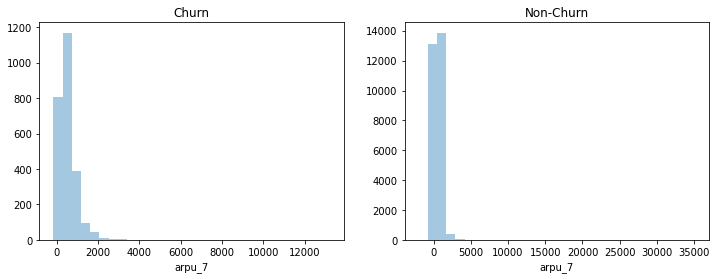

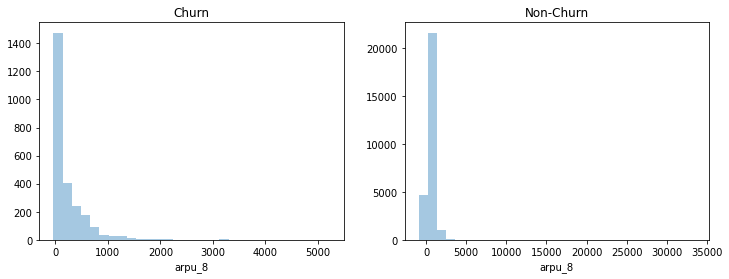

In [50]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].arpu_6,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].arpu_6,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].arpu_7,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].arpu_7,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].arpu_8,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].arpu_8,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

Understanding Offnet_mou (All kind of calls outside the operator T network) for Churn and Non-churn

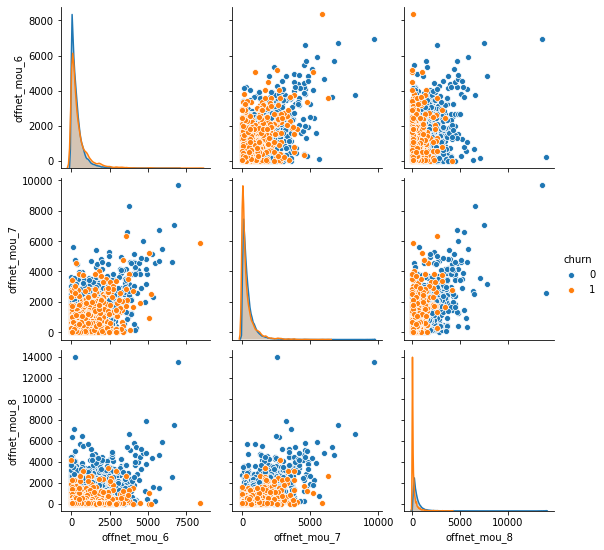

In [51]:
##pairplot for Offnet
sns.pairplot(data= telecomdf_good_clean[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']], hue='churn')

Text(0.5, 1.0, 'Non-Churn')

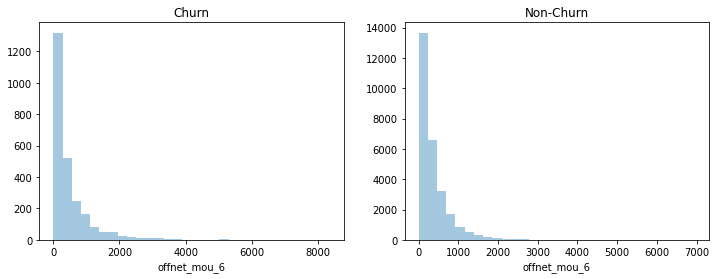

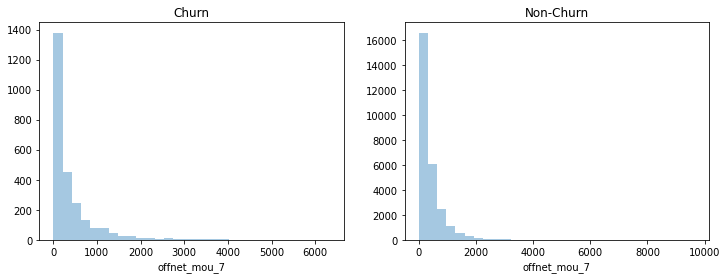

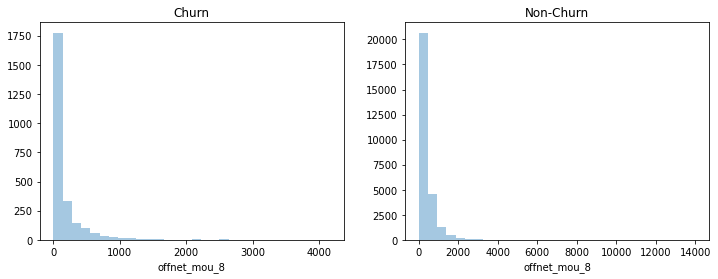

In [52]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].offnet_mou_6,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].offnet_mou_6,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].offnet_mou_7,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].offnet_mou_7,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].offnet_mou_8,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].offnet_mou_8,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

std_og_mou (Outside calling circle/zone calls)

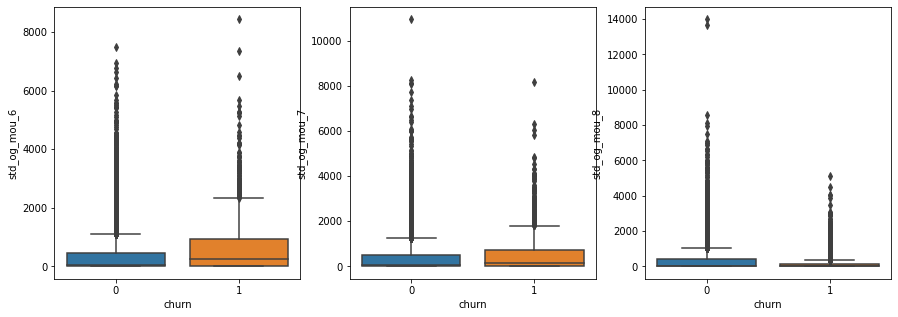

In [53]:
#plotting boxplot 
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='churn', y='std_og_mou_6', data=telecomdf_good_clean, ax=ax[0])
sns.boxplot(x='churn', y='std_og_mou_7', data=telecomdf_good_clean, ax=ax[1])
sns.boxplot(x='churn', y='std_og_mou_8', data=telecomdf_good_clean, ax=ax[2])
plt.show()

### Number of times customer recharged mobile

Text(0.5, 1.0, 'Non-Churn')

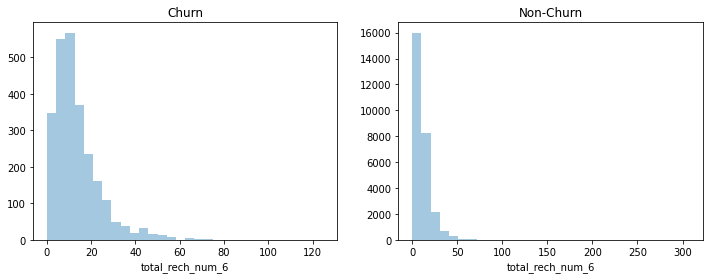

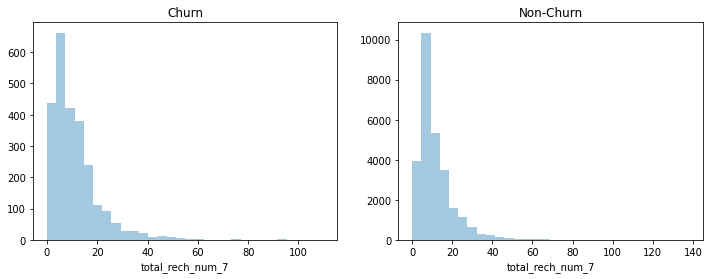

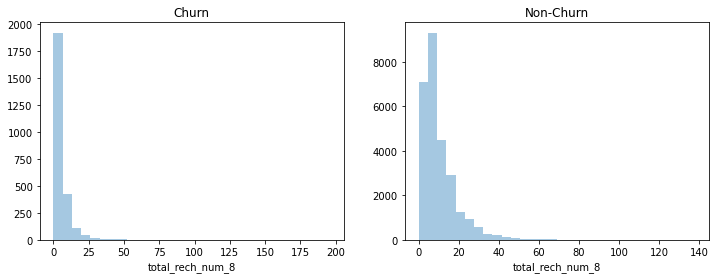

In [54]:
#total_rech_num (number of times customer recharged mobile)
fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].total_rech_num_6,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].total_rech_num_6,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].total_rech_num_7,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].total_rech_num_7,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

fig, axes = plt.subplots(1,2, figsize=(12,4))
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==1].total_rech_num_8,
                  bins=30, ax=axes[0], kde=False )
ax.set_title('Churn')
ax = sns.distplot(telecomdf_good_clean[telecomdf_good_clean['churn']==0].total_rech_num_8,
                  bins=30, ax=axes[1], kde=False )
ax.set_title('Non-Churn')

In [55]:
## AON- age on network description check.
telecomdf_good_clean['aon'].describe(percentiles=[.25, .50, .75, .90, .95, .99])

count    30000.000000
mean      1216.949200
std        959.581181
min        180.000000
25%        464.000000
50%        857.000000
75%       1777.000000
90%       2805.000000
95%       3139.000000
99%       3651.000000
max       4321.000000
Name: aon, dtype: float64

In [56]:
## check Correlation columns more than 80%
telecomdf_good_clean_cor = telecomdf_good_clean.drop(['mobile_number', 'churn'], axis=1)

corr_matrix = telecomdf_good_clean_cor.corr().abs()

#Select higher correlated values
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("Count of high correlated columns-", len(high_corr_features))
print(high_corr_features)

Count of high correlated columns- 49
['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


#### Outlier checking for all values

In [57]:
## numeric columns.
numclm_1= telecomdf_good_clean.dtypes[telecomdf_good_clean.dtypes != 'object'].index
print("Numerical columns-", len(numclm_1))

catclm_1 = telecomdf_good_clean.dtypes[telecomdf_good_clean.dtypes == 'object'].index
print("Categorical columns- ", len(catclm_1))

Numerical columns- 165
Categorical columns-  0


In [58]:
telecomdf_good_clean.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,churn
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,7.001207e+09,555.963808,558.686475,506.293829,261.937912,269.077506,236.769570,378.192287,382.310147,340.948621,16.190885,12.635352,12.709879,27.168897,20.305465,20.125342,82.795836,83.419635,76.554190,165.135796,164.914150,154.236487,6.524199,6.608770,6.039365,1.563821,1.882690,1.727738,254.464204,254.951055,236.838108,168.409007,177.699150,152.500652,181.566277,189.891987,160.383868,1.834673,1.854808,1.629819,...,66.039473,60.261253,60.579210,61.770494,55.862320,0.011800,0.010800,0.01020,0.159433,0.168767,0.140133,1.004167,1.142700,0.995967,0.207567,0.219133,0.201100,0.202200,0.219333,0.193833,0.972333,0.968733,0.949833,1216.949200,162.160093,171.305062,152.107460,523.492176,592.782039,524.653852,0.719233,0.871233,0.927033,9.479497e+03,9271.115867,7795.885100,4.163477e+05,4.727415e+05,4.306585e+05,0.084433
std,6.905108e+05,456.892058,477.179284,500.188703,450.559648,471.429189,450.060714,474.865798,490.990666,476.782490,75.337227,75.057820,74.047139,116.557865,95.675826,103.971581,218.463055,228.358662,214.456177,248.081072,240.220034,232.498079,22.218466,22.186062,19.582472,6.197109,9.112096,7.254480,369.734896,366.190472,353.244123,400.549207,419.420886,396.272952,405.684395,429.147959,407.604410,11.547598,12.753406,10.787211,...,182.230005,169.028104,160.259301,164.178144,151.596684,0.107987,0.103362,0.10048,0.422872,0.440028,0.391196,2.499178,2.725726,2.507448,0.607093,0.654060,0.609594,0.979599,1.085234,1.088777,0.164019,0.174040,0.218292,959.581181,416.872879,438.184240,412.355101,1397.655585,1453.191944,1598.609192,9.507777,10.603050,13.496661,1.900061e+04,16260.905938,17605.349669,5.214533e+06,2.945654e+06,4.506355e+06,0.278041
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [0]:
#Removing the entries above 99 percentile and below 1 percentile
outlier_colmns = [col for col in list(telecomdf_good_clean) if col not in ['mobile_number','churn']]

for col1 in outlier_colmns:
  cap = telecomdf_good_clean[col1].quantile([0.01,.99]).values
  telecomdf_good_clean[col1][telecomdf_good_clean[col1] <= cap[0]] = cap[0]
  telecomdf_good_clean[col1][telecomdf_good_clean[col1] >= cap[1]] = cap[1]


In [60]:
telecomdf_good_clean.describe(percentiles=[.01,.25, .50, .75, .90, .95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_count_data_6,total_rech_count_data_7,total_rech_count_data_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,churn
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,7.001207e+09,546.382805,548.962754,495.856072,253.299500,259.889181,227.683658,370.210072,373.455008,330.927379,13.682896,9.677328,10.009942,23.343165,16.821205,16.256025,74.892591,74.811614,68.825743,159.666268,160.117600,149.717840,5.828403,5.908062,5.448791,1.354155,1.568663,1.495731,247.023836,247.221926,229.932207,160.538427,169.486150,144.374582,173.360493,181.286367,150.505030,1.326448,1.286244,1.150019,...,61.402257,56.615254,56.646807,57.694663,52.566961,0.011800,0.010800,0.01020,0.158033,0.167167,0.138467,0.973567,1.102333,0.959800,0.198567,0.206433,0.191433,0.165700,0.184000,0.147933,0.972333,0.968733,0.949833,1216.350067,153.534458,162.156650,143.127490,478.219035,545.163623,468.775478,0.374167,0.446400,0.397667,8933.945833,8776.439933,7264.634867,3.033759e+05,3.469649e+05,3.080049e+05,0.084433
std,6.905108e+05,354.082777,356.875209,380.272158,393.526002,409.291398,383.056590,425.025121,434.091831,403.784683,48.837067,38.154428,39.090914,79.912873,62.247384,59.847378,140.771361,140.899627,128.932608,211.136495,208.226602,202.371279,13.986815,14.094468,13.220009,3.944762,4.450562,4.380598,317.864944,313.066067,301.679784,345.719773,361.837596,335.828822,348.499001,367.054344,323.833927,5.464067,5.350799,4.845938,...,146.524451,140.980622,127.494273,131.876009,126.371530,0.107987,0.103362,0.10048,0.414485,0.430614,0.379779,2.304903,2.484230,2.270247,0.538096,0.555484,0.535098,0.589849,0.694281,0.588666,0.164019,0.174040,0.218292,957.740582,351.094920,370.441724,341.888493,810.172403,950.807821,877.675586,1.610792,1.920395,1.922616,11090.344431,11059.215433,10657.487249,6.550472e+05,7.762743e+05,7.856438e+05,0.278041
min,7.000000e+09,0.309900,0.049800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## For Modeling we need to split into train and test

In [0]:
## create X and y variables
X= telecomdf_good_clean.drop(['churn'], axis=1)
y= telecomdf_good_clean['churn']

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [0]:
#Splitting into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [64]:
print(X_train.shape)
X_train.info()

(21000, 164)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 4636 to 5640
Columns: 164 entries, mobile_number to total_rech_8
dtypes: float64(164)
memory usage: 26.4 MB


In [0]:
## Rescaling the features using MinMax scaler
scaler = MinMaxScaler()

## fit and transform on the train data
X_train= scaler.fit_transform(X_train)

## only transform and test data
X_test = scaler.transform(X_test)

In [66]:
print("Shape of X_train-", X_train.shape)
print("Shape of X_test-", X_test.shape)

Shape of X_train- (21000, 164)
Shape of X_test- (9000, 164)


In [67]:
## check the data imbalance in y_train and y_test
y_train_imbl= (y_train !=0).sum()/(y_train==0).sum()
y_test_imbl = (y_test !=0).sum()/(y_test==0).sum()

print("Train data imbalance-", y_train_imbl)
print("Test data imbalance-", y_test_imbl)

Train data imbalance- 0.09164630659666267
Test data imbalance- 0.09356014580801944


In [68]:
## apply SMOTE technique to handle Data imbalance

from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=12 , ratio=1)
X_train_bal, y_train_bal = smo.fit_sample(X_train, y_train)
print("X_train balanced data frame", X_train_bal.shape)
print("Y_train balanced data frame", y_train_bal.shape)

data_imbal = (y_train_bal !=0).sum()/(y_train_bal ==0).sum()
print("Imbalance in train after SMOTE-", data_imbal)

X_train balanced data frame (38474, 164)
Y_train balanced data frame (38474,)
Imbalance in train after SMOTE- 1.0


#PCA model

In [0]:
# import PCA model
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

In [70]:
##apply PCA fit on X_train_bal
pca.fit(X_train_bal)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [71]:
pca.components_

array([[ 9.99876148e-03,  1.32152661e-01,  1.50026830e-01, ...,
        -3.92848388e-02, -3.25487941e-02, -2.25795113e-02],
       [ 4.89507205e-02,  8.20820104e-02,  1.28809093e-01, ...,
         6.70781454e-02,  8.05713441e-02,  7.75467599e-02],
       [-7.99858017e-02,  5.79211508e-02,  7.60028719e-02, ...,
         7.86737387e-02,  8.45979450e-02,  6.72202827e-02],
       ...,
       [ 1.32517356e-06,  3.59601987e-04, -4.98651548e-03, ...,
        -1.03974630e-02,  5.77713163e-03,  4.28902378e-03],
       [ 1.04722451e-19, -7.93920552e-17, -2.26906075e-17, ...,
        -3.82391870e-16, -8.37242105e-18,  2.71899406e-16],
       [-0.00000000e+00,  5.71348508e-17, -1.42509616e-16, ...,
         5.43388581e-17, -3.05561061e-17, -8.88308885e-17]])

In [72]:
new_df = pd.DataFrame(X_train_bal)
new_col_names = list(new_df)
pca_df = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 'Features':X.columns})
pca_df.head()

,PC1,PC2,Features
0,0.009999,0.048951,mobile_number
1,0.132153,0.082082,arpu_6
2,0.150027,0.128809,arpu_7
3,0.115849,0.174249,arpu_8
4,0.165295,-0.035176,onnet_mou_6


In [73]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.23341296e-01, 1.12704561e-01, 7.15605298e-02, 6.38003715e-02,
       4.12029921e-02, 3.71689281e-02, 2.91510435e-02, 2.71697356e-02,
       2.32199522e-02, 2.18791022e-02, 2.13360274e-02, 1.85413472e-02,
       1.71305260e-02, 1.59787354e-02, 1.43922660e-02, 1.40145139e-02,
       1.34767419e-02, 1.28505783e-02, 1.19903130e-02, 1.19434887e-02,
       1.15108730e-02, 1.09532383e-02, 1.01722791e-02, 9.57501451e-03,
       8.98702024e-03, 8.49009139e-03, 8.19647684e-03, 8.07135343e-03,
       7.70662856e-03, 7.35397678e-03, 6.48551312e-03, 6.09297554e-03,
       5.97899639e-03, 5.85545207e-03, 5.65932043e-03, 5.50968795e-03,
       5.47379544e-03, 5.24293249e-03, 5.10793068e-03, 4.84578276e-03,
       4.78053522e-03, 4.57450976e-03, 4.32460224e-03, 4.25615257e-03,
       4.03321536e-03, 3.97950735e-03, 3.86346016e-03, 3.78624193e-03,
       3.75618281e-03, 3.60057407e-03, 3.46838614e-03, 3.37615884e-03,
       3.31022899e-03, 3.19554398e-03, 3.16189403e-03, 3.05707332e-03,
      

In [0]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

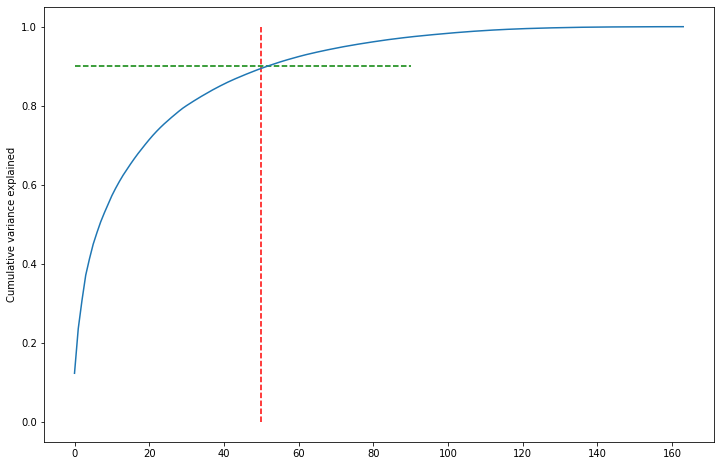

In [75]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.90, xmax=90, xmin=0, colors='g', linestyles='--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 50 components

In [0]:
## performing Incremental PCA for efficiency with 50 components
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=50)

In [77]:
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=50, whiten=False)

Use the final PCA model to transform X_train balanced data

In [0]:
X_train_pca = pca_final.fit_transform(X_train_bal)

In [79]:
X_train_pca.shape

(38474, 50)

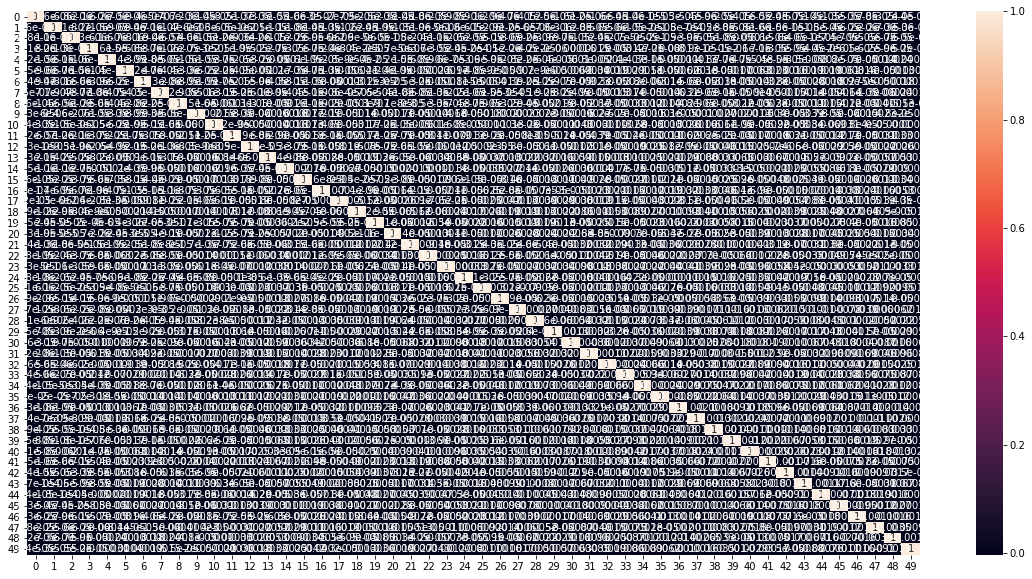

In [80]:
## printing the correlation matrix

corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, annot=True)

From the Correlation matrix there is no high correlation b/w two components. 

In [81]:
## let us now apply the transformation on test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9000, 50)

## Applying Logistic regression on the data on our Principal components

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
learner_pca = LogisticRegression(class_weight= 'balanced')

In [84]:
model_pca = learner_pca.fit(X_train_pca, y_train_bal)
model_pca

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### making prediction on train data and checking ROC curve

In [0]:
## predict on training data
train_predpca = model_pca.predict(X_train_pca)

## predict the probabilities 
train_probs_predict = model_pca.predict_proba(X_train_pca)[:,1]

In [86]:
## check all metrics
print("roc_auc_score(Train) with PCA : {:.3}".format(metrics.roc_auc_score(y_train_bal, train_probs_predict)))
print("Accuracy(Train) with PCA : {:.3}".format(metrics.accuracy_score(y_train_bal ,train_predpca)))
print("Recall(Train) with PCA : {:.3}".format(metrics.recall_score(y_train_bal,train_predpca)))
print("Precision(Train) with PCA : {:.3}".format(metrics.precision_score(y_train_bal,train_predpca)))

roc_auc_score(Train) with PCA : 0.899
Accuracy(Train) with PCA : 0.831
Recall(Train) with PCA : 0.856
Precision(Train) with PCA : 0.815


In [87]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final = pd.DataFrame({'churn': y_train_bal, 'churn_prob':train_probs_predict})

y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map(lambda x:1 if x> 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted
0,0,0.916337,1
1,0,0.248952,0
2,0,0.057458,0
3,0,0.534395,1
4,0,0.028287,0


In [88]:
## overall metrics 
print("*** LR Model Metrics after probability cutoff in Train Data***")
print("Accuracy with PCA : {:2.3}".format(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)))
print("Recall with PCA : {:2.3}".format(metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)))
print("Precision with PCA : {:2.3}".format(metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.predicted)))

*** LR Model Metrics after probability cutoff in Train Data***
Accuracy with PCA : 0.831
Recall with PCA : 0.856
Precision with PCA : 0.815


In [89]:
## Metrics beyond accuracy
confusion= metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
print(confusion)

# Look at the confusion matrix again 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[15495  3742]
 [ 2775 16462]]


In [0]:
## Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [0]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

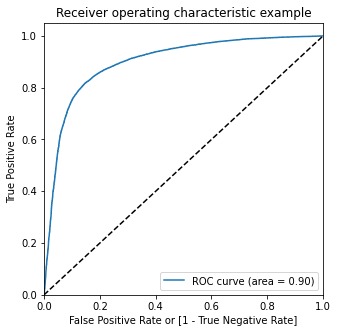

In [92]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

In [0]:
## making perdiction on test data
y_pred = model_pca.predict(X_test_pca)

In [94]:
## predict the probabilities 
test_probs_predict = model_pca.predict_proba(X_test_pca)[:,1]

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final = pd.DataFrame({'churn': y_test , 'churn_prob':test_probs_predict})

y_test_pred_final['predicted'] = y_test_pred_final.churn_prob.map(lambda x:1 if x> 0.5 else 0)
y_test_pred_final.head()

,churn,churn_prob,predicted
6102,0,0.021463,0
2539,0,0.000878,0
21576,0,0.521104,1
19574,1,0.006378,0
12804,0,0.170207,0


In [95]:
# Let's check the test accuracy.
print("Accuracy (Test) :  {:2.4}".format(metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)))

Accuracy (Test) :  0.8094


In [96]:
confusion2 =  metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.predicted )
confusion2

array([[6651, 1579],
       [ 136,  634]])

In [97]:
# Let's take a look at the confusion matrix again 
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print(" ---Test Metrics--- ")

roc_score=metrics.roc_auc_score(y_test,test_probs_predict)
print("Roc_auc_score : {:2.4}".format(roc_score))

# Let's see the sensitivity of our logistic regression model
Sensitivity=TP / float(TP+FN)
print('Sensitivity/Recall : {:2.4}'.format(Sensitivity))

# Let us calculate specificity
Specificity=TN / float(TN+FP)
print('Specificity : {:2.4}'.format(Specificity))

 ---Test Metrics--- 
Roc_auc_score : 0.8847
Sensitivity/Recall : 0.8234
Specificity : 0.8081


#Random Forest
Let's first fit a random forest model with default hyperparameters.

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [0]:
#model the PCA components with RandomForestClassifier

model_rfc = rfc.fit(X_train_pca, y_train_bal)

In [0]:
#making prediction on test
forest_predict_test = rfc.predict(X_test_pca)

In [101]:
## classfication report of default model
print(classification_report(y_test, forest_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8230
           1       0.48      0.47      0.48       770

    accuracy                           0.91      9000
   macro avg       0.71      0.71      0.71      9000
weighted avg       0.91      0.91      0.91      9000



In [102]:
## print confusion matrix
print(confusion_matrix(y_test, forest_predict_test))

[[7831  399]
 [ 405  365]]


In [103]:
## accuracy score
print("Random forest-Accuracy- {:.3}".format(metrics.accuracy_score(y_test, forest_predict_test)))

Random forest-Accuracy- 0.911


### Tunning max_depth 
Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [105]:
# specify number of folds for k-fold CV
n_folds= 5

parameters= {'max_depth': range(10, 30, 5)}

rfc_1 = RandomForestClassifier()

# fit tree on training data
rfc_1grid = GridSearchCV(rfc_1, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rfc_1grid.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [106]:
# scores of GridSearch CV
scores= rfc_1grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.971302,0.035766,0.096114,0.001098,10,{'max_depth': 10},0.879922,0.892917,0.886680,0.893567,0.892384,0.889094,0.005204,4
1,22.850534,0.088202,0.131019,0.000953,15,{'max_depth': 15},0.937882,0.937492,0.934373,0.938921,0.939303,0.937594,0.001741,3
2,25.460817,0.047437,0.145674,0.002537,20,{'max_depth': 20},0.949578,0.948928,0.947628,0.950747,0.951651,0.949706,0.001400,2
3,26.995002,0.109645,0.154100,0.003747,25,{'max_depth': 25},0.953086,0.950877,0.950097,0.953086,0.953210,0.952072,0.001318,1


In [107]:
print(len(pd.DataFrame(scores).columns))
pd.DataFrame(scores).columns

14


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

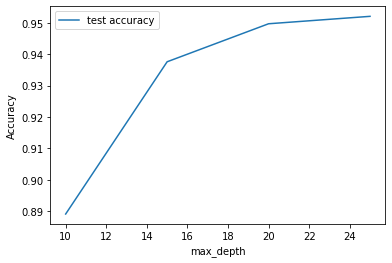

In [108]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Controlling the depth of the constituent trees will help reduce overfitting in the forest.

In [109]:
print("best accuracy : ", rfc_1grid.best_score_)
print(rfc_1grid.best_params_)

best accuracy :  0.9520715584221893
{'max_depth': 25}


Tuning n_estimators : 

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit. 

In [110]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model (note we are specifying a max_depth)
rfc_2 = RandomForestClassifier(max_depth=25,random_state=10)


# fit tree on training data
rfc_2grid = GridSearchCV(rfc_2, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rfc_2grid.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=25,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                    

In [111]:
# scores of GridSearch CV
scores2 = rfc_2grid.cv_results_
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.597126,0.093409,0.077977,0.000535,50,{'n_estimators': 50},0.952827,0.953216,0.947109,0.952827,0.95568,0.952332,0.002820,4
1,20.332291,0.132112,0.114621,0.000844,75,{'n_estimators': 75},0.954776,0.953346,0.948798,0.954516,0.95490,0.953267,0.002301,2
2,27.108907,0.232583,0.152960,0.001653,100,{'n_estimators': 100},0.954126,0.953346,0.950357,0.952697,0.95555,0.953215,0.001717,3
3,33.768951,0.129499,0.189616,0.000970,125,{'n_estimators': 125},0.954646,0.953216,0.951527,0.954126,0.95581,0.953865,0.001439,1


In [112]:
print(len(pd.DataFrame(scores2).columns))
pd.DataFrame(scores2).columns

14


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

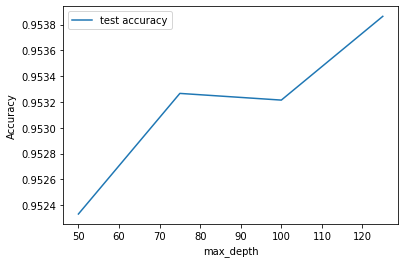

In [113]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [114]:
print("best accuracy", rfc_2grid.best_score_)
print(rfc_2grid.best_params_)

best accuracy 0.9538649983033622
{'n_estimators': 125}


Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [115]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rfc_3 = RandomForestClassifier()

# fit tree on training data
rfc_3grid = GridSearchCV(rfc_3, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rfc_3grid.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [116]:
# scores of GridSearch CV
scores3 = rfc_3grid.cv_results_
pd.DataFrame(scores3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,23.587349,0.104457,0.111689,0.000930,200,{'min_samples_split': 200},0.848863,0.874334,0.871735,0.875504,0.871588,0.868405,0.009886,1
1,22.897637,0.145330,0.106624,0.000672,250,{'min_samples_split': 250},0.842755,0.868356,0.857050,0.871085,0.864050,0.860659,0.010129,2
2,22.143036,0.247639,0.102116,0.000775,300,{'min_samples_split': 300},0.837037,0.863028,0.851332,0.862508,0.857941,0.854369,0.009629,3
3,21.551839,0.483778,0.098949,0.000548,350,{'min_samples_split': 350},0.831969,0.857960,0.850812,0.857440,0.853912,0.850419,0.009580,4
4,20.814965,0.060720,0.096203,0.000509,400,{'min_samples_split': 400},0.822482,0.851072,0.843795,0.856140,0.850403,0.844778,0.011819,5


In [117]:
print(len(pd.DataFrame(scores3).columns))
pd.DataFrame(scores3).columns

14


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

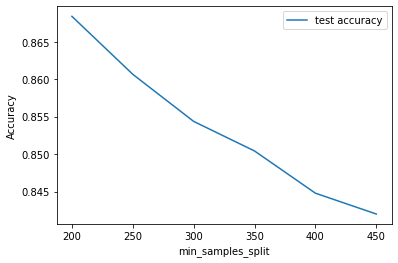

In [118]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores3["param_min_samples_split"], 
         scores3["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [119]:
print("best accuracy", rfc_3grid.best_score_)
print(rfc_3grid.best_params_)

best accuracy 0.8684047196426403
{'min_samples_split': 200}


Fitting the final model with the best parameters obtained from grid search.

In [120]:
print(rfc_1grid.best_params_, rfc_2grid.best_params_, rfc_3grid.best_params_)

{'max_depth': 25} {'n_estimators': 125} {'min_samples_split': 200}


In [0]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier

rfc_final= RandomForestClassifier(bootstrap=True,
                                  max_depth=25,
                                  min_samples_split=200,
                                  n_estimators=125)

In [0]:
## fit the model
train_rfc = rfc_final.fit(X_train_pca, y_train_bal)

In [0]:
# predict on test
rfc_predict = rfc_final.predict(X_test_pca)

In [124]:
# Let's check the report
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      8230
           1       0.40      0.64      0.49       770

    accuracy                           0.89      9000
   macro avg       0.68      0.77      0.71      9000
weighted avg       0.92      0.89      0.90      9000



In [125]:
## Accuracy score -Test
print("Accuracy Test-", accuracy_score(y_test,rfc_predict))

Accuracy Test- 0.8871111111111111


In [126]:
# confusion matrix
print(confusion_matrix(y_test,rfc_predict))

[[7494  736]
 [ 280  490]]


In [127]:
# predicting churn with default cut-off 0.5
cut_off =0.5

# predict
pred_probs = train_rfc.predict_proba(X_train_pca)[:,1]
y_train_rfc1= pd.DataFrame({'churn':y_train_bal, 'churn_Prob':pred_probs})
y_train_rfc1['predicted'] = y_train_rfc1.churn_Prob.map( lambda x: 1 if x > cut_off else 0)
y_train_rfc1.head()

,churn,churn_Prob,predicted
0,0,0.370459,0
1,0,0.305853,0
2,0,0.108692,0
3,0,0.385762,0
4,0,0.204227,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.550736  1.000000  0.101471
0.2   0.2  0.725347  0.998700  0.451994
0.3   0.3  0.849535  0.984821  0.714249
0.4   0.4  0.900322  0.945886  0.854759
0.5   0.5  0.901284  0.876592  0.925976
0.6   0.6  0.866741  0.771482  0.962000
0.7   0.7  0.815980  0.651349  0.980610
0.8   0.8  0.740890  0.491189  0.990591
0.9   0.9  0.629334  0.260540  0.998129


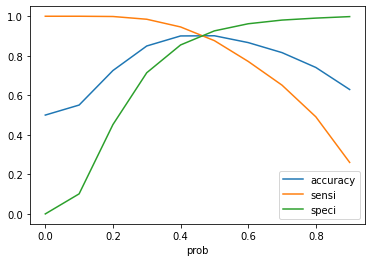

In [128]:
#find optimal cutoff

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_rfc1[i] = y_train_rfc1.churn_Prob.map( lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_rfc1.churn, y_train_rfc1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [129]:
#let us take the cut-off as 0.48
# predicting churn with cut-off 0.48
cut_off=0.48

 # predict
pred_probs_rfc1 = train_rfc.predict_proba(X_train_pca)[:,1]

y_train_pred_rfc1= pd.DataFrame({'churn':y_train_bal, 'churn_Prob':pred_probs_rfc1})
y_train_pred_rfc1['predicted'] = y_train_pred_rfc1.churn_Prob.map( lambda x: 1 if x > cut_off else 0)
y_train_pred_rfc1.head()

,churn,churn_Prob,predicted
0,0,0.370459,0
1,0,0.305853,0
2,0,0.108692,0
3,0,0.385762,0
4,0,0.204227,0


In [130]:
print("## TRAIN DATA METRICS ##")
accuracyRFTR=metrics.accuracy_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Accuracy: {:2.4}".format(accuracyRFTR))
RecallRFTR=metrics.recall_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Recall : {:2.4}".format(RecallRFTR))
PrecisionRFTR=metrics.precision_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Precision : {:2.4}".format(PrecisionRFTR))
RocRFTR=metrics.roc_auc_score(y_train_pred_rfc1.churn, y_train_pred_rfc1.predicted)
print("Roc_auc_score : {:2.4}".format(RocRFTR))

## TRAIN DATA METRICS ##
Accuracy: 0.9033
Recall : 0.8921
Precision : 0.9126
Roc_auc_score : 0.9033


In [131]:
#Lets see how it performs on test data.

cut_off=0.48
 # predict
pred_probs_rfc_tst = train_rfc.predict_proba(X_test_pca)[:,1]

y_test_rfc= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs_rfc_tst})
# Creating new column 'predicted' with 1 if Churn_Prob>0.48 else 0
y_test_rfc['predicted'] = y_test_rfc.churn_Prob.map( lambda x: 1 if x > cut_off else 0)
# Let's see the head
y_test_rfc.head()

,churn,churn_Prob,predicted
6102,0,0.186864,0
2539,0,0.059340,0
21576,0,0.180443,0
19574,1,0.091696,0
12804,0,0.149848,0


In [132]:
print("## TEST DATA METRICS ##")

AccuracyRFT=metrics.accuracy_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Accuracy: {:2.4}".format(AccuracyRFT))
RecallRFT =metrics.recall_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Recall : {:2.4}".format(RecallRFT))
PrecisionRFT =metrics.precision_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Precision : {:2.4}".format(PrecisionRFT))
RocRFT=metrics.roc_auc_score(y_test_rfc.churn, y_test_rfc.predicted)
print("Roc_auc_score : {:2.4}".format(RocRFT))

## TEST DATA METRICS ##
Accuracy: 0.8783
Recall : 0.6753
Precision : 0.381
Roc_auc_score : 0.7863


In [133]:
importances = train_rfc.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'Values','ColNames'})
RF_feature_importance.head()

,ColNames,Values
0,0.206804,arpu_6
1,0.094897,arpu_8
2,0.092929,onnet_mou_6
3,0.053822,roam_ic_mou_8
4,0.043347,arpu_7


In [134]:
RF_feature_importance.Values

0               arpu_6
1               arpu_8
2          onnet_mou_6
3        roam_ic_mou_8
4               arpu_7
5        roam_ic_mou_6
6         offnet_mou_8
7        mobile_number
8          og_others_6
9        roam_og_mou_7
10    loc_og_t2t_mou_8
11    loc_og_t2m_mou_7
12    loc_og_t2c_mou_8
13        isd_og_mou_7
14    loc_og_t2c_mou_7
15    loc_og_t2f_mou_8
16    std_og_t2f_mou_7
17        offnet_mou_7
18        isd_og_mou_6
19    loc_og_t2t_mou_7
20    loc_og_t2m_mou_8
21         onnet_mou_8
22        isd_og_mou_8
23        loc_og_mou_6
24       roam_og_mou_8
25        loc_og_mou_8
26    std_og_t2f_mou_6
27        offnet_mou_6
28       roam_ic_mou_7
29    loc_og_t2m_mou_6
30        std_og_mou_7
31         onnet_mou_7
32        spl_og_mou_8
33    loc_og_t2f_mou_6
34    loc_og_t2f_mou_7
35        std_og_mou_8
36        loc_og_mou_7
37    loc_og_t2c_mou_6
38        spl_og_mou_6
39        spl_og_mou_7
40    std_og_t2m_mou_8
41    std_og_t2f_mou_8
42    std_og_t2t_mou_6
43       ro

XGBoost

Let's try XGBoost without PCA to find important parameters

In [0]:
## import all the library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

In [0]:
#XGBOOST modelling
xg_boostmodel = XGBClassifier()

In [137]:
## x_train, y_train, x_test and y_test before PCA
print(X_train_bal.shape)
print(y_train_bal.shape)

(38474, 164)
(38474,)


In [138]:
print(X_test.shape)
print(y_test.shape)

(9000, 164)
(9000,)


In [139]:
xg_boostmodel.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = xg_boostmodel.predict_proba(X_test)

In [141]:
## AUC score
roc= metrics.roc_auc_score(y_test, y_pred[:,1])
print("Auc: %.3f%%" % roc)

Auc: 0.907%


The roc_auc in this case is about 0.90% with default hyperparameters. Let's try changing the hyperparameters - an exhaustive list of XGBoost

In [0]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [143]:
# fit the model
xgb_model_cv.fit(X_train_bal, y_train_bal)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [144]:
# cv results
cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.088659,0.087339,0.080442,0.001557,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.972502,0.994015,0.993733,0.986750,0.010076,5,0.998292,0.988403,0.988970,0.991889,0.004534
1,24.588675,0.082894,0.080343,0.002459,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.973739,0.994706,0.994124,0.987523,0.009749,3,0.998553,0.988926,0.989524,0.992334,0.004404
2,23.535653,0.140350,0.078095,0.003331,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.972272,0.994845,0.993952,0.987023,0.010437,4,0.998357,0.989390,0.989357,0.992368,0.004235
3,19.061377,0.084020,0.078589,0.001510,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.971428,0.994251,0.992710,0.986130,0.010415,6,0.999859,0.991963,0.992364,0.994729,0.003631
4,24.832501,0.232788,0.079270,0.001833,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970580,0.996662,0.996833,0.988025,0.012336,2,0.999953,0.994820,0.995032,0.996602,0.002371
5,23.552894,0.181844,0.078887,0.003313,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.970027,0.997916,0.997362,0.988435,0.013018,1,0.999989,0.995731,0.995814,0.997178,0.001988


In [145]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [0]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')

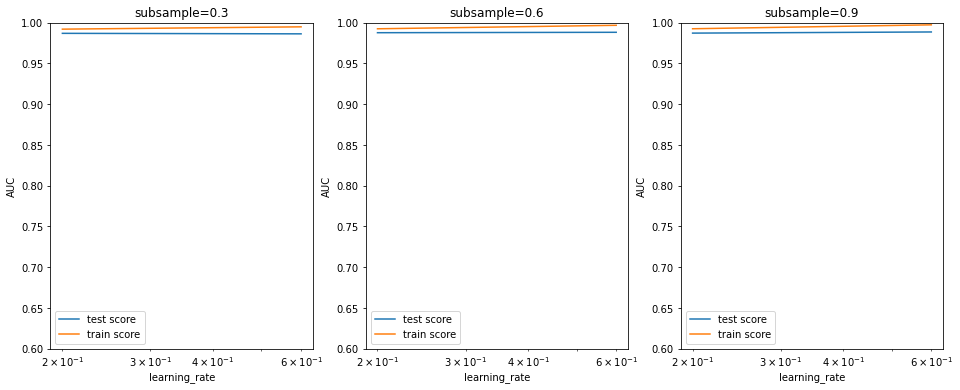

In [147]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='bottom left')
    plt.xscale('log')

Seeing the above plots, it seems to be same and we will consider a subsample size of 0.3 and learning_rate of about 0.2

In [148]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
model_final =  XGBClassifier(params = params)
model_final.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [149]:
y_pred_final = model_final.predict_proba(X_test)
y_pred_final[:10]

array([[0.88254035, 0.11745966],
       [0.9738298 , 0.02617017],
       [0.97387195, 0.02612806],
       [0.9828884 , 0.01711162],
       [0.9264644 , 0.07353561],
       [0.9324369 , 0.06756309],
       [0.94775474, 0.05224524],
       [0.9352269 , 0.06477311],
       [0.8895688 , 0.11043119],
       [0.8688401 , 0.13115993]], dtype=float32)

In [150]:
# roc_auc
roc_score = metrics.roc_auc_score(y_test, y_pred_final[:,1])
print("Auc: %.3f%%" % roc_score)

Auc: 0.907%


In [151]:
## Accuracu score on train and test
preds_train = model_final.predict(X_train_bal)
preds_test = model_final.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train_bal, preds_train)
accuracy_test = metrics.accuracy_score(y_test, preds_test)
print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

Accuracy in the train dataset: 0.938607891043302
Accuracy in the test dataset: 0.913


In [152]:
#Finally, let's also look at the feature importances.
imp_fea = dict(zip(X.columns, model_final.feature_importances_))
imp_fea

{'aon': 0.0047382237,
 'arpu_2g_6': 0.00097457954,
 'arpu_2g_7': 0.003114316,
 'arpu_2g_8': 0.0018572703,
 'arpu_3g_6': 0.00088609406,
 'arpu_3g_7': 0.00409572,
 'arpu_3g_8': 0.0024365766,
 'arpu_6': 0.0,
 'arpu_7': 0.0036952104,
 'arpu_8': 0.030675313,
 'av_rech_amt_data_6': 0.0,
 'av_rech_amt_data_7': 0.00275299,
 'av_rech_amt_data_8': 0.0027678763,
 'avg_rech_amt_6': 0.003609734,
 'avg_rech_amt_7': 0.0018779358,
 'avg_rech_amt_8': 0.0,
 'count_rech_2g_6': 0.0033655262,
 'count_rech_2g_7': 0.0021166038,
 'count_rech_2g_8': 0.0019856081,
 'count_rech_3g_6': 0.0,
 'count_rech_3g_7': 0.0023461883,
 'count_rech_3g_8': 0.004984735,
 'fb_user_6': 0.0,
 'fb_user_7': 0.0,
 'fb_user_8': 0.0,
 'ic_others_6': 0.0066830604,
 'ic_others_7': 0.006011887,
 'ic_others_8': 0.0063321944,
 'isd_ic_mou_6': 0.0050680367,
 'isd_ic_mou_7': 0.0019171345,
 'isd_ic_mou_8': 0.007322801,
 'isd_og_mou_6': 0.0014906658,
 'isd_og_mou_7': 0.0045390013,
 'isd_og_mou_8': 0.004433402,
 'last_day_rch_amt_6': 0.00929404

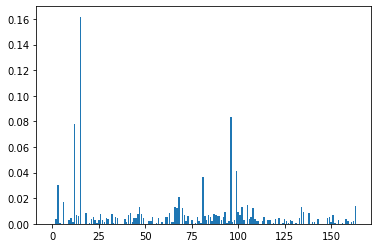

In [153]:
# plot
plt.bar(range(len(model_final.feature_importances_)), model_final.feature_importances_)
plt.show()

DIFFERENT MODEL EVALUATION METRICS

With PCA
1. Model Metrics Logistic Regression
probability cuttoff= 0.50

TRAIN ==> Accuracy: 83.06%, Recall/Sensitivity: 85.57%, Precision: 81%, roc auc score: 89.9%
TEST ==> Accuracy: 80.94%, Recall/Sensitivity: 82.34% , Specificity : 80.81%, roc auc score: 88.47%

2. Model Metrics Random Forest
probability cuttoff= 0.48
TRAIN ==> Accuracy: 90.0%, Recall/Sensitivity: 88.8%, roc auc score: 90.0%
TEST ==>  Accuracy: 87.8%, Recall/Sensitivity: 67.5%, roc auc score: 78.6%

Without PCA- XGBoost
TRAIN ==> Accuracy- 93.8%
TEST ==> Accuracy- 91.3%, roc auc score: 90.7%, 


Recomendations:
1. The telecom company should pay close attention to MoU, ARPU month over month.
2. The Average revenue shows dip in action phase is a sign if churn.
3. All kind of calls outside the operator T network(offnet)in the good phase is a sign of churn.

Important features are
1. arpu_6, arpu_7 and arpu_8
2. offnet_mou_8 (calls outside the operator T network)
3. onnet_mou_6  (calls within the same operator network)